In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

covid_raw = pd.read_csv("maycovid.csv")
covid_raw

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-05-28 02:32:31,34.223334,-82.461707,35,0,0,35,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-05-28 02:32:31,30.295065,-92.414197,397,22,0,375,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-05-28 02:32:31,37.767072,-75.632346,780,12,0,768,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-05-28 02:32:31,43.452658,-116.241552,798,22,0,776,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-05-28 02:32:31,41.330756,-94.471059,7,0,0,7,"Adair, Iowa, US"
...,...,...,...,...,...,...,...,...,...,...,...,...
3409,NaN,NaN,NaN,West Bank and Gaza,2020-05-28 02:32:31,31.952200,35.233200,434,3,365,66,West Bank and Gaza
3410,NaN,NaN,NaN,Western Sahara,2020-05-28 02:32:31,24.215500,-12.885800,9,1,6,2,Western Sahara
3411,NaN,NaN,NaN,Yemen,2020-05-28 02:32:31,15.552727,48.516388,256,53,10,193,Yemen
3412,NaN,NaN,NaN,Zambia,2020-05-28 02:32:31,-13.133897,27.849332,1057,7,779,271,Zambia


In [2]:
covid_raw.dtypes

FIPS              float64
Admin2             object
Province_State     object
Country_Region     object
Last_Update        object
Lat               float64
Long_             float64
Confirmed           int64
Deaths              int64
Recovered           int64
Active              int64
Combined_Key       object
dtype: object

In [3]:
covid_raw.shape

(3414, 12)

In [4]:
del_col_list = ['FIPS', 'Last_Update']

covid = covid_raw.drop(del_col_list, axis=1)
covid.head()

,Admin2,Province_State,Country_Region,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,Abbeville,South Carolina,US,34.223334,-82.461707,35,0,0,35,"Abbeville, South Carolina, US"
1,Acadia,Louisiana,US,30.295065,-92.414197,397,22,0,375,"Acadia, Louisiana, US"
2,Accomack,Virginia,US,37.767072,-75.632346,780,12,0,768,"Accomack, Virginia, US"
3,Ada,Idaho,US,43.452658,-116.241552,798,22,0,776,"Ada, Idaho, US"
4,Adair,Iowa,US,41.330756,-94.471059,7,0,0,7,"Adair, Iowa, US"


In [5]:
covid.columns = covid.columns.str.replace('Admin2','County')
covid.columns = covid.columns.str.replace('Long_','Long')
covid.head()

,County,Province_State,Country_Region,Lat,Long,Confirmed,Deaths,Recovered,Active,Combined_Key
0,Abbeville,South Carolina,US,34.223334,-82.461707,35,0,0,35,"Abbeville, South Carolina, US"
1,Acadia,Louisiana,US,30.295065,-92.414197,397,22,0,375,"Acadia, Louisiana, US"
2,Accomack,Virginia,US,37.767072,-75.632346,780,12,0,768,"Accomack, Virginia, US"
3,Ada,Idaho,US,43.452658,-116.241552,798,22,0,776,"Ada, Idaho, US"
4,Adair,Iowa,US,41.330756,-94.471059,7,0,0,7,"Adair, Iowa, US"


In [6]:
print(covid.shape)
duplicate_rows_covid = covid[covid.duplicated()]
print(duplicate_rows_covid.shape)

(3414, 10)
(0, 10)


In [7]:
covid.columns

Index(['County', 'Province_State', 'Country_Region', 'Lat', 'Long',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'Combined_Key'],
      dtype='object')

In [8]:
print(covid.isnull().sum())

County            401
Province_State    178
Country_Region      0
Lat                68
Long               68
Confirmed           0
Deaths              0
Recovered           0
Active              0
Combined_Key        0
dtype: int64


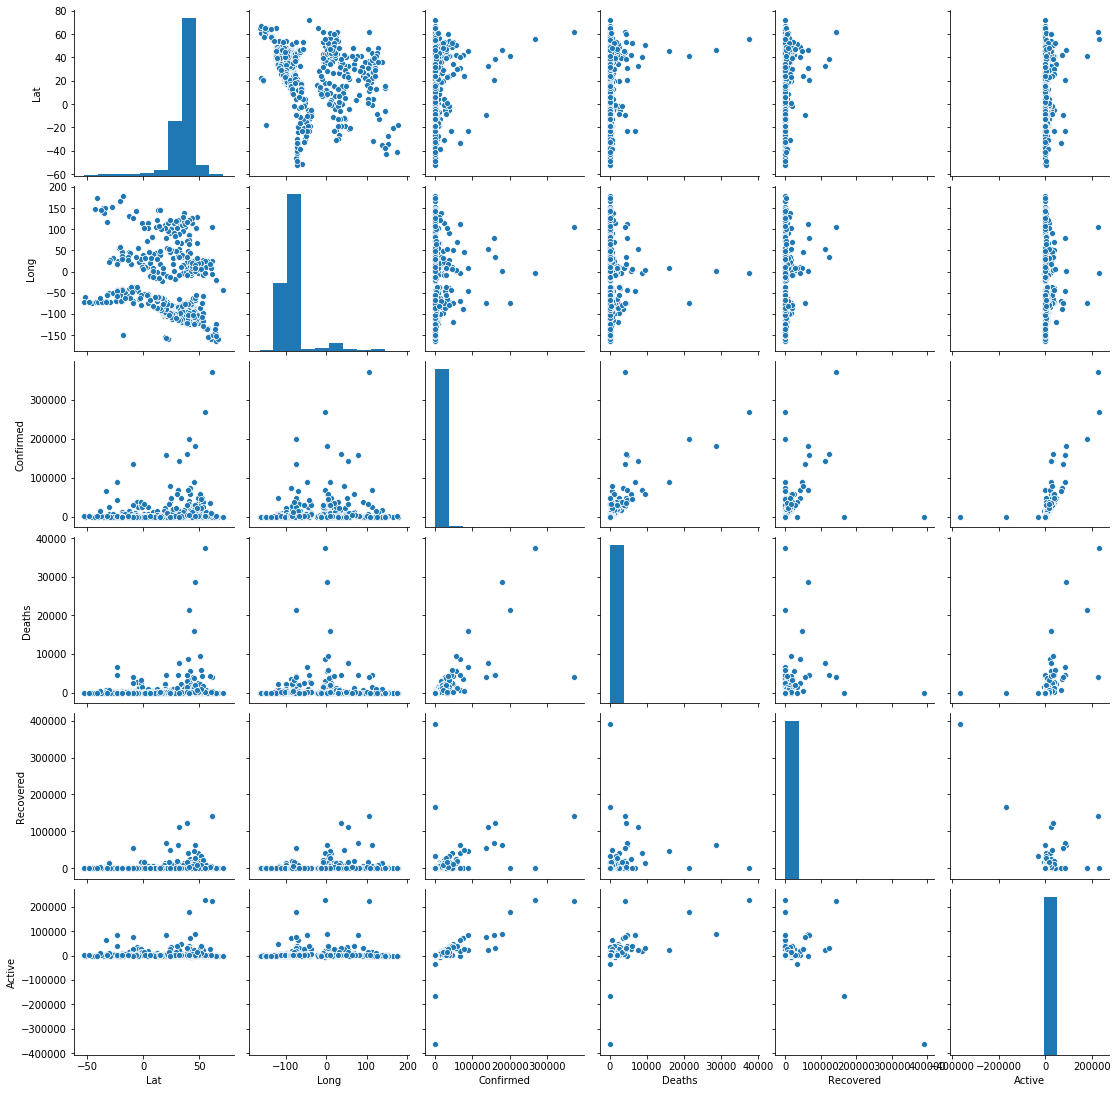

In [9]:
sns.pairplot(covid)
#there appears to be more confirmed cases and more deaths as latitude increases (north)

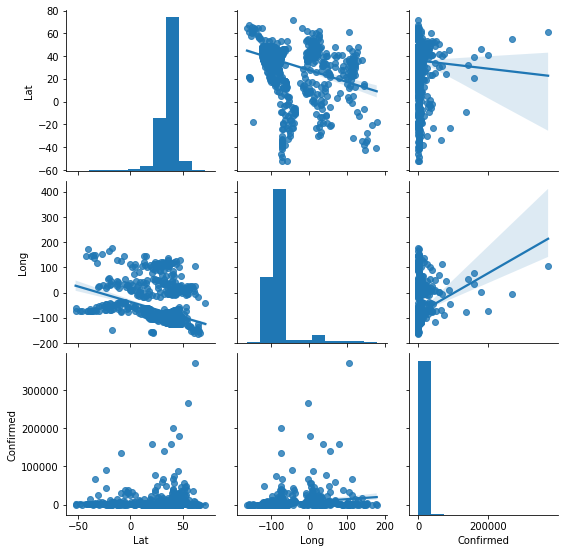

In [10]:
df_related = covid[['Lat','Long','Confirmed']]
sns.pairplot(df_related, kind='reg')

In [11]:
cases = covid.sort_values(by ='Confirmed', ascending=False)
cases

,County,Province_State,Country_Region,Lat,Long,Confirmed,Deaths,Recovered,Active,Combined_Key
3368,NaN,NaN,Russia,61.524010,105.318756,370680,3968,142208,224504,Russia
3404,NaN,NaN,United Kingdom,55.378100,-3.436000,267240,37460,0,229780,United Kingdom
1942,New York City,New York,US,40.767273,-73.971526,199968,21362,0,178606,"New York City, New York, US"
3293,NaN,NaN,France,46.227600,2.213700,180044,28546,64503,86995,France
3400,NaN,NaN,Turkey,38.963700,35.243300,159797,4431,122793,32573,Turkey
...,...,...,...,...,...,...,...,...,...,...
3222,NaN,Unknown,Spain,NaN,NaN,0,0,0,0,"Unknown, Spain"
2697,Unassigned,Indiana,US,NaN,NaN,0,159,0,-159,"Unassigned, Indiana, US"
2448,Sheridan,Nebraska,US,42.502844,-102.412661,0,0,0,0,"Sheridan, Nebraska, US"
955,Garfield,Washington,US,46.431975,-117.545403,0,0,0,0,"Garfield, Washington, US"


In [12]:
average_in_country = covid.groupby(["Country_Region"])[["Confirmed"]].mean()
average_in_country.sort_values(by='Confirmed', ascending = False)


,Confirmed
Country_Region,
Russia,370680.0
Turkey,159797.0
India,158086.0
Iran,141591.0
Peru,135905.0
...,...
Seychelles,11.0
MS Zaandam,9.0
Western Sahara,9.0


In [13]:
def find_min_max_in(col):
    """
    The function takes in a column and returns the top 5
    and bottom 5 in that column.
    
    args:
        col: string - column name
    return:
        info_df: dataframe - final 5 dataframe
    """
    
    worst = covid[col].idxmax()
    worst_df = pd.DataFrame(covid.loc[worst])
    
    best = covid[col].idxmin()
    best_df = pd.DataFrame(covid.loc[best])
    
    info_df = pd.concat([worst_df, best_df], axis=1)
    return info_df

find_min_max_in('Confirmed')

,3368,83
County,NaN,Arthur
Province_State,NaN,Nebraska
Country_Region,Russia,US
Lat,61.524,41.569
Long,105.319,-101.696
Confirmed,370680,0
Deaths,3968,0
Recovered,142208,0
Active,224504,0
Combined_Key,Russia,"Arthur, Nebraska, US"


In [14]:
  def find_min_max_in(col): 
    worst = covid[col].idxmax()
    worst_df = pd.DataFrame(covid.loc[worst])
    
    best = covid[col].idxmin()
    best_df = pd.DataFrame(covid.loc[best])
    
    info_df = pd.concat([worst_df, best_df], axis=1)
    return info_df

find_min_max_in('Deaths')


,3404,0
County,NaN,Abbeville
Province_State,NaN,South Carolina
Country_Region,United Kingdom,US
Lat,55.3781,34.2233
Long,-3.436,-82.4617
Confirmed,267240,35
Deaths,37460,0
Recovered,0,0
Active,229780,35
Combined_Key,United Kingdom,"Abbeville, South Carolina, US"


In [15]:
average_in_lat = covid.groupby(["Lat"])[["Confirmed"]].mean()
average_in_lat.sort_values(by='Confirmed', ascending = False)

,Confirmed
Lat,
61.524010,370680.0
55.378100,267240.0
40.767273,199968.0
46.227600,180044.0
38.963700,159797.0
...,...
41.915862,0.0
41.566503,0.0
46.233153,0.0


In [16]:
covid['fatalities'] = covid['Deaths'] / covid['Confirmed']
cols = covid.columns
covid = covid[cols]
covid.sort_values(by = ['fatalities'], ascending=False)

,County,Province_State,Country_Region,Lat,Long,Confirmed,Deaths,Recovered,Active,Combined_Key,fatalities
2687,Unassigned,Arizona,US,NaN,NaN,0,2,0,-2,"Unassigned, Arizona, US",inf
2733,Unassigned,Wyoming,US,NaN,NaN,0,13,0,-13,"Unassigned, Wyoming, US",inf
2717,Unassigned,North Dakota,US,NaN,NaN,0,8,0,-8,"Unassigned, North Dakota, US",inf
2711,Unassigned,Nevada,US,NaN,NaN,0,6,0,-6,"Unassigned, Nevada, US",inf
2703,Unassigned,Maryland,US,NaN,NaN,0,67,0,-67,"Unassigned, Maryland, US",inf
...,...,...,...,...,...,...,...,...,...,...,...
2839,Washington,Kansas,US,39.784208,-97.087532,0,0,0,0,"Washington, Kansas, US",NaN
3176,NaN,Recovered,US,NaN,NaN,0,0,391508,-364117,"Recovered, US",NaN
3219,NaN,Unknown,Brazil,NaN,NaN,0,0,166647,-166647,"Unknown, Brazil",NaN
3220,NaN,Unknown,Chile,NaN,NaN,0,0,33540,-33540,"Unknown, Chile",NaN


In [17]:
#need to figure out how to remove rows with 'inf' fatalities

In [18]:
find_min_max_in('fatalities')

,2687,0
County,Unassigned,Abbeville
Province_State,Arizona,South Carolina
Country_Region,US,US
Lat,NaN,34.2233
Long,NaN,-82.4617
Confirmed,0,35
Deaths,2,0
Recovered,0,0
Active,-2,35
Combined_Key,"Unassigned, Arizona, US","Abbeville, South Carolina, US"


In [19]:
average_fatalities = covid.groupby(["Country_Region"])[["fatalities"]].mean()
average_fatalities.sort_values(by = ['fatalities'], ascending=False).head()

,fatalities
Country_Region,
US,inf
MS Zaandam,0.222222
Yemen,0.207031
Belgium,0.162592
Hungary,0.133140


In [20]:
covid.corr()

,Lat,Long,Confirmed,Deaths,Recovered,Active,fatalities
Lat,1.000000,-0.357331,-0.036375,0.009210,0.003772,-0.058857,0.011808
Long,-0.357331,1.000000,0.235082,0.145377,0.278142,0.160131,0.016188
Confirmed,-0.036375,0.235082,1.000000,0.754176,0.429323,0.693105,0.032280
Deaths,0.009210,0.145377,0.754176,1.000000,0.223009,0.565718,0.059655
Recovered,0.003772,0.278142,0.429323,0.223009,1.000000,-0.351046,0.019835
Active,-0.058857,0.160131,0.693105,0.565718,-0.351046,1.000000,0.028443
fatalities,0.011808,0.016188,0.032280,0.059655,0.019835,0.028443,1.000000


In [21]:
#List of all of the countries in the dataset 

covid.Country_Region.unique()

array(['US', 'Italy', 'Brazil', 'Mexico', 'Canada', 'Spain',
       'United Kingdom', 'China', 'Chile', 'Netherlands', 'Australia',
       'Germany', 'Denmark', 'France', 'Afghanistan', 'Albania',
       'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Central African Republic',
       'Chad', 'Colombia', 'Comoros', 'Congo (Brazzaville)',
       'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia',
       'Cuba', 'Cyprus', 'Czechia', 'Diamond Princess', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'Gabon', 'G

In [22]:
#Add in a way to determine which territories go with which countries (and use on map?)

In [23]:
covid[covid['Country_Region']=='Australia']['Confirmed'].mean()
#it is likely that Australia is split into territories

893.75

In [24]:
covid[covid['Country_Region']=='United Kingdom']['Confirmed'].mean()
#It is likely that the UK is not split into territories

24419.909090909092

In [25]:
covid.mean()

Lat             36.104244
Long           -80.531102
Confirmed     1667.190978
Deaths         104.167838
Recovered      688.367897
Active         882.678383
fatalities            inf
dtype: float64

In [26]:
covid.std()

Lat              11.763628
Long             40.244297
Confirmed     11735.082842
Deaths         1024.359904
Recovered      8803.470047
Active        10361.865410
fatalities             NaN
dtype: float64

**US Data:**

Confirmed Cases:

In [27]:
covid[covid['Country_Region']=='US']['Confirmed'].mean()

#average number of cases per US location

562.641059602649

In [28]:
covid[covid['Country_Region']=='US']['Confirmed'].std()

4436.221444484899

In [29]:
covid[covid['Country_Region']=='US']['Confirmed'].median()

40.0

In [30]:
covid[covid['Country_Region']=='US']['Confirmed'].mode()
#This shows that due to the fact that so many US locations have no confirmed cases, the data is likely inaccurate (not sufficient testing)

0    1
dtype: int64

In [31]:
covid[covid['Country_Region']=='US']['Confirmed'].min()

0

In [32]:
covid[covid['Country_Region']=='US']['Confirmed'].max()

199968

In [33]:
quantile1 = covid[covid['Country_Region']=='US']['Confirmed'].quantile(0.25)
quantile1

10.0

In [34]:
quantile3 = covid[covid['Country_Region']=='US']['Confirmed'].quantile(0.75)
quantile3

188.25

In [35]:
IQR = quantile3-quantile1
IQR

178.25

Deaths:

In [36]:
covid[covid['Country_Region']=='US']['Deaths'].mean()

33.25099337748345

In [37]:
covid[covid['Country_Region']=='US']['Deaths'].std()

414.20310065784923

In [38]:
covid[covid['Country_Region']=='US']['Deaths'].median()

1.0

In [39]:
covid[covid['Country_Region']=='US']['Deaths'].mode()

0    0
dtype: int64

In [40]:
covid[covid['Country_Region']=='US']['Confirmed'].max()

199968

In [41]:
covid[covid['Country_Region']=='US']['Deaths'].quantile(0.9)

31.0

Linear Regression and Machine Learning

In [42]:
drop = ['fatalities']

covid = covid.drop(drop, axis=1)
covid.head()

,County,Province_State,Country_Region,Lat,Long,Confirmed,Deaths,Recovered,Active,Combined_Key
0,Abbeville,South Carolina,US,34.223334,-82.461707,35,0,0,35,"Abbeville, South Carolina, US"
1,Acadia,Louisiana,US,30.295065,-92.414197,397,22,0,375,"Acadia, Louisiana, US"
2,Accomack,Virginia,US,37.767072,-75.632346,780,12,0,768,"Accomack, Virginia, US"
3,Ada,Idaho,US,43.452658,-116.241552,798,22,0,776,"Ada, Idaho, US"
4,Adair,Iowa,US,41.330756,-94.471059,7,0,0,7,"Adair, Iowa, US"


In [43]:
# select numerical columns
numerical_data = covid.select_dtypes(np.number).fillna(0)
numerical_data

,Lat,Long,Confirmed,Deaths,Recovered,Active
0,34.223334,-82.461707,35,0,0,35
1,30.295065,-92.414197,397,22,0,375
2,37.767072,-75.632346,780,12,0,768
3,43.452658,-116.241552,798,22,0,776
4,41.330756,-94.471059,7,0,0,7
...,...,...,...,...,...,...
3409,31.952200,35.233200,434,3,365,66
3410,24.215500,-12.885800,9,1,6,2
3411,15.552727,48.516388,256,53,10,193
3412,-13.133897,27.849332,1057,7,779,271


In [44]:
# split the numerical data into training and test sets
from sklearn.model_selection import train_test_split

target_variable = 'Confirmed'
independent_variables = numerical_data.drop(columns = target_variable).columns
independent_variables

Index(['Lat', 'Long', 'Deaths', 'Recovered', 'Active'], dtype='object')

In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    numerical_data[independent_variables],
    numerical_data[target_variable],
    test_size=0.2,
    random_state=13
)

In [46]:
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test',  X_test.shape)
print('y_test',  y_test.shape)

X_train (2731, 5)
y_train (2731,)
X_test (683, 5)
y_test (683,)


In [47]:
# create a linear regression model and fit it with the training set
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
print(model.intercept_)

print(model.coef_)

16.16664689321601
[1.5421561  0.87551992 0.88723283 0.97031154 1.02410427]


In [49]:
# predict confirmed using test set
predictions = model.predict(X_test)

In [50]:
X = X_test.reset_index().copy()
X['Confirmed'] = y_test.tolist()
X['prediction'] = predictions
X.head()

,index,Lat,Long,Deaths,Recovered,Active,Confirmed,prediction
0,1372,40.533587,-77.399751,4,0,91,95,107.653162
1,2663,43.344594,-99.885489,0,0,6,6,1.703667
2,3296,42.315400,43.356900,12,557,166,735,840.495058
3,1206,42.455221,-98.784026,0,0,1,1,-3.824053
4,2191,36.859148,-76.359716,11,0,271,282,293.446572


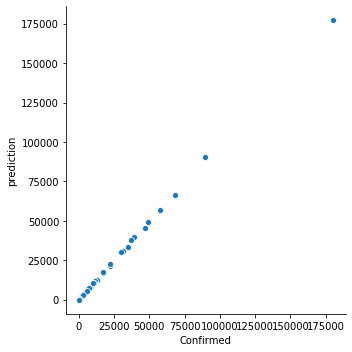

In [51]:
# visualize the actual confirmed against predicted 
sns.relplot(x='Confirmed', y='prediction', data=X, kind='scatter')

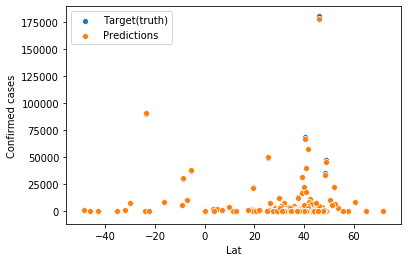

In [52]:
#visualize latitude against confirmed
sns.scatterplot(x=X["Lat"], y=X["Confirmed"], label = 'Target(truth)')
sns.scatterplot(x=X["Lat"], y=X["prediction"], label = 'Predictions')
sns.mpl.pyplot.ylabel("Confirmed cases");

# Cross Validation

In [53]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [54]:
model = LinearRegression()

In [55]:
from sklearn.metrics import SCORERS

In [56]:
results_cross_validation = cross_val_score(
    estimator=model, 
    X=numerical_data[independent_variables],
    y=numerical_data[target_variable],
    scoring="neg_mean_absolute_error", 
    cv=5,
)

# 5 repetitions means 5 cv

In [57]:
results_cross_validation

array([  -14.67441074,   -14.85317946,   -23.02537247,   -15.30256467,
       -3405.71407625])

In [58]:
model_mae = results_cross_validation.mean()
model_mae

-694.71392071692

In [59]:
import pandas as pd
january = pd.read_csv("januarycovid.csv")
february = pd.read_csv("februarycovid.csv")
march = pd.read_csv("marchcovid.csv")
april = pd.read_csv("aprilcovid.csv")
may = pd.read_csv("maycovid.csv")

In [60]:
january.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,Hubei,Mainland China,1/28/20 23:00,3554,125.0,80.0
1,Guangdong,Mainland China,1/28/20 23:00,207,NaN,4.0
2,Zhejiang,Mainland China,1/28/20 23:00,173,NaN,3.0
3,Henan,Mainland China,1/28/20 23:00,168,1.0,NaN
4,Hunan,Mainland China,1/28/20 23:00,143,NaN,NaN


In [61]:
february.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,Hubei,Mainland China,2020-02-28T00:43:01,65914,2682,26403
1,NaN,South Korea,2020-02-28T08:53:03,2337,13,22
2,Guangdong,Mainland China,2020-02-28T08:53:03,1348,7,935
3,Henan,Mainland China,2020-02-28T09:23:02,1272,20,1112
4,Zhejiang,Mainland China,2020-02-28T10:03:12,1205,1,975


In [62]:
march.head(10)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,3/28/20 23:05,34.223334,-82.461707,3,0,0,0,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,3/28/20 23:05,30.295065,-92.414197,9,1,0,0,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,3/28/20 23:05,37.767072,-75.632346,2,0,0,0,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,3/28/20 23:05,43.452658,-116.241552,76,0,0,0,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,3/28/20 23:05,41.330756,-94.471059,1,0,0,0,"Adair, Iowa, US"
5,21001.0,Adair,Kentucky,US,3/28/20 23:05,37.104598,-85.281297,0,0,0,0,"Adair, Kentucky, US"
6,29001.0,Adair,Missouri,US,3/28/20 23:05,40.190586,-92.600782,1,0,0,0,"Adair, Missouri, US"
7,40001.0,Adair,Oklahoma,US,3/28/20 23:05,35.884942,-94.658593,3,0,0,0,"Adair, Oklahoma, US"
8,8001.0,Adams,Colorado,US,3/28/20 23:05,39.874321,-104.336258,71,0,0,0,"Adams, Colorado, US"
9,16003.0,Adams,Idaho,US,3/28/20 23:05,44.893336,-116.454525,0,0,0,0,"Adams, Idaho, US"


In [63]:
april.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-04-29 02:32:29,34.223334,-82.461707,29,0,0,29,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-04-29 02:32:29,30.295065,-92.414197,130,9,0,121,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-04-29 02:32:29,37.767072,-75.632346,223,4,0,219,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-04-29 02:32:29,43.452658,-116.241552,662,16,0,646,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-04-29 02:32:29,41.330756,-94.471059,1,0,0,1,"Adair, Iowa, US"


In [64]:
may.tail(20)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
3394,NaN,NaN,NaN,Tanzania,2020-05-28 02:32:31,-6.369028,34.888822,509,21,183,305,Tanzania
3395,NaN,NaN,NaN,Thailand,2020-05-28 02:32:31,15.870032,100.992541,3054,57,2931,66,Thailand
3396,NaN,NaN,NaN,Timor-Leste,2020-05-28 02:32:31,-8.874217,125.727539,24,0,24,0,Timor-Leste
3397,NaN,NaN,NaN,Togo,2020-05-28 02:32:31,8.619500,0.824800,395,13,183,199,Togo
3398,NaN,NaN,NaN,Trinidad and Tobago,2020-05-28 02:32:31,10.691800,-61.222500,116,8,108,0,Trinidad and Tobago
3399,NaN,NaN,NaN,Tunisia,2020-05-28 02:32:31,33.886917,9.537499,1051,48,929,74,Tunisia
3400,NaN,NaN,NaN,Turkey,2020-05-28 02:32:31,38.963700,35.243300,159797,4431,122793,32573,Turkey
3401,NaN,NaN,NaN,Uganda,2020-05-28 02:32:31,1.373333,32.290275,281,0,69,212,Uganda
3402,NaN,NaN,NaN,Ukraine,2020-05-28 02:32:31,48.379400,31.165600,21905,658,7995,13252,Ukraine
3403,NaN,NaN,NaN,United Arab Emirates,2020-05-28 02:32:31,23.424076,53.847818,31969,255,16371,15343,United Arab Emirates


# Time Series

In [65]:
conda install -c plotly plotly=4.8.1

Solving environment: done

## Package Plan ##

  environment location: /Users/elysemigdal/opt/anaconda3

  added / updated specs:
    - plotly=4.8.1


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    plotly-4.8.1               |             py_0         4.7 MB  plotly
    retrying-1.3.3             |           py37_2          16 KB
    ------------------------------------------------------------
                                           Total:         4.7 MB

The following NEW packages will be INSTALLED:

  plotly             plotly/noarch::plotly-4.8.1-py_0
  retrying           pkgs/main/osx-64::retrying-1.3.3-py37_2



retrying-1.3.3       | 16 KB     | ##################################### | 100% 
plotly-4.8.1         | 4.7 MB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to re

In [66]:
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns
sns.set()

import numpy as np 
import matplotlib 

import plotly.graph_objects as go 
import plotly.express as px

### Link to raw files for Covid-19 time series data set

In [67]:
confirmed_cases_link = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
death_cases_link = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
recovered_cases_link = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
country_cases_link = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv"

### Download datasets into respective data frames

In [68]:
confirmed_df = pd.read_csv(confirmed_cases_link)
print(confirmed_df.shape)
deaths_df = pd.read_csv(death_cases_link)
print(deaths_df.shape)
recovered_df = pd.read_csv(recovered_cases_link)
print(recovered_df.shape)
cases_country_df = pd.read_csv(country_cases_link)
print(cases_country_df.shape)

(266, 142)
(266, 142)
(253, 142)
(188, 14)


In [69]:
confirmed_df["Country/Region"].tail(20).sort_values()

252                 Botswana
247                    Burma
253                  Burundi
263                  Comoros
258                   France
246                   Kosovo
265                  Lesotho
251               MS Zaandam
256                   Malawi
255              Netherlands
261    Sao Tome and Principe
254             Sierra Leone
259              South Sudan
264               Tajikistan
250           United Kingdom
257           United Kingdom
249           United Kingdom
248           United Kingdom
260           Western Sahara
262                    Yemen
Name: Country/Region, dtype: object

In [70]:
# Looking at confirmed cases in Australia
confirmed_df[confirmed_df["Country/Region"]=="Australia"]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,107,107,107,107,107,107,107,107,108,108
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,3092,3095,3098,3104,3104,3106,3110,3110,3109,3112
10,Northern Territory,Australia,-12.4634,130.8456,0,0,0,0,0,0,...,29,29,29,29,29,29,29,29,29,29
11,Queensland,Australia,-28.0167,153.4000,0,0,0,0,0,0,...,1058,1058,1058,1059,1059,1060,1060,1061,1061,1062
12,South Australia,Australia,-34.9285,138.6007,0,0,0,0,0,0,...,440,440,440,440,440,440,440,440,440,440
13,Tasmania,Australia,-41.4545,145.9707,0,0,0,0,0,0,...,228,228,228,228,228,228,228,228,228,228
14,Victoria,Australia,-37.8136,144.9631,0,0,0,0,1,1,...,1645,1649,1653,1663,1670,1678,1681,1681,1685,1687
15,Western Australia,Australia,-31.9505,115.8605,0,0,0,0,0,0,...,585,586,589,591,592,592,592,596,599,599


In [71]:
# There are 188 countries in this data set
confirmed_df["Country/Region"].nunique()

188

### Imputing data

In [72]:
confirmed_df = confirmed_df.replace(np.nan, '', regex=True)
deaths_df = deaths_df.replace(np.nan, '', regex=True)
recovered_df = recovered_df.replace(np.nan, '', regex=True)
cases_country_df = cases_country_df.replace(np.nan, '', regex=True)

### Viewing Columns

In [73]:
cases_country_df['Recovered'] = pd.to_numeric(cases_country_df['Recovered'], errors='coerce')

### Exploratory Analysis

In [74]:
global_data = cases_country_df.copy().drop(['Lat', 'Long_', 'Country_Region', 'Last_Update'],axis=1)
                    #,'ISO3','UID','Incident_Rate','People_Tested', 'People_Hospitalized'], axis=1)
global_summary = pd.DataFrame(global_data.sum()).transpose()

In [90]:
global_summary.style.format('{:,.0f}')

ValueError: Unknown format code 'f' for object of type 'str'

### For Chart 1: TotlalConfirmed Coronavirus Cases (Globally)

In [76]:
confirmed_ts = confirmed_df.copy().drop(['Lat', 'Long', 'Country/Region','Province/State'], axis=1)
confirmed_ts_summary = confirmed_ts.sum()

In [77]:
confirmed_ts_summary

1/22/20        555
1/23/20        654
1/24/20        941
1/25/20       1434
1/26/20       2118
            ...   
6/3/20     6508635
6/4/20     6632985
6/5/20     6764918
6/6/20     6891213
6/7/20     7010349
Length: 138, dtype: int64

In [78]:
confirmed_ts

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20
0,0,0,0,0,0,0,0,0,0,0,...,13659,14525,15205,15750,16509,17267,18054,18969,19551,20342
1,0,0,0,0,0,0,0,0,0,0,...,1099,1122,1137,1143,1164,1184,1197,1212,1232,1246
2,0,0,0,0,0,0,0,0,0,0,...,9134,9267,9394,9513,9626,9733,9831,9935,10050,10154
3,0,0,0,0,0,0,0,0,0,0,...,764,764,764,765,844,851,852,852,852,852
4,0,0,0,0,0,0,0,0,0,0,...,81,84,86,86,86,86,86,86,88,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,0,0,0,0,0,0,0,0,0,0,...,463,479,483,484,484,484,485,499,499,513
262,0,0,0,0,0,0,0,0,0,0,...,283,310,323,354,399,419,453,469,482,484
263,0,0,0,0,0,0,0,0,0,0,...,87,106,106,106,132,132,132,132,141,141
264,0,0,0,0,0,0,0,0,0,0,...,3686,3807,3930,4013,4100,4191,4289,4370,4453,4529


In [93]:
fig_1 = go.Figure(data=go.Scatter(x=confirmed_ts_summary.index, y=confirmed_ts_summary.values,
                       mode='lines+markers'))
fig_1.update_layout(title='Total Coronavirus Confirmed Cases (Globally)',
                   yaxis_title='Confirmed Cases', xaxis_tickangle= 315)
fig_1.show()

### Defining a template plot function and color array

In [80]:
# Initializing Color array to be used across the analysis
color_arr = px.colors.qualitative.Dark24

In [91]:
def draw_plot(ts_array, ts_label, title, colors, mode_size, line_size, 
             x_axis_title, y_axis_title, tickangle = 0, yaxis_type='',
             additional_annotations=[]):
    # initialize figure
    fig = go.Figure()
    # add all traces
    for index, ts in enumerate(ts_array):
        fig.add_trace(go.Scatter(x=ts.index,
                                y=ts.values,
                                name=ts_label[index],
                                line=dict(color=colors[index],width=line_size[index]),connectgaps=True,))
        
    # base x axis prop
    x_axis_dict = dict(showline=True,
                      showgrid=True,
                      showticklabels=True,
                      linecolor='rgb(204,204,204)',
                      linewidth=2,
                      ticks='outside',
                      tickfont=dict(family='Arial',size=12, color='rgb(82,82,82)',))
    
    # setting x_axis params
    if x_axis_title:
        x_axis_dict['title'] = x_axis_title
        
    if tickangle > 0:
        x_axis_dict['tickangle']=tickangle

    # base y_axis
    y_axis_dict = dict(showline=True,
                      showgrid=True,
                      showticklabels=True,
                      linecolor='rgb(204,204,204)',
                      linewidth=2)
    
    # setting y_axis params
    if yaxis_type != '':
        y_axis_dict['type']=yaxis_type
        
    if y_axis_title:
        y_axis_dict['title'] = y_axis_title
        
#updating the layout
    fig.update_layout(xaxis=x_axis_dict,
                     yaxis=y_axis_dict,
                     autosize=True,
                     margin=dict(autoexpand=True, l=100,r=20,t=110,),
                     showlegend=True)
    
    # base annotations for any graph
    annotations = []
    # Title
    annotations.append(dict(xref='paper', yref='paper', x=0.0, y= 1.05, xanchor='left',
                           yanchor='bottom',text=title,
                            font=dict(family='Arial',size=16,color='rgb(37,37,37)'),showarrow=False))
    # adding annotations in params
    if len(additional_annotations) > 0:
        annotations.append(additional_annotations)
        
    # updating the layout
    fig.update_layout(annotations=annotations)
    
    return fig

### For Chart 2: Covid-19 Case Status

In [82]:
confirmed_agg_ts = confirmed_df.copy().drop(['Lat','Long','Country/Region',
                                            'Province/State'],axis=1).sum()
death_agg_ts = deaths_df.copy().drop(['Lat','Long','Country/Region',
                                            'Province/State'],axis=1).sum()
recovered_agg_ts = recovered_df.copy().drop(['Lat','Long','Country/Region',
                                            'Province/State'],axis=1).sum()

# There is no timeseries data for Active cases, therefore it needs to be engineered
active_agg_ts = pd.Series(
    data=np.array(
        [(x1 - x2) - x3 for (x1, x2, x3) in zip(confirmed_agg_ts.values, death_agg_ts.values, 
                                             recovered_agg_ts.values)]),
    index=confirmed_agg_ts.index)

In [83]:
death_agg_ts

1/22/20        17
1/23/20        18
1/24/20        26
1/25/20        42
1/26/20        56
            ...  
6/3/20     385933
6/4/20     391122
6/5/20     395866
6/6/20     399703
6/7/20     402724
Length: 138, dtype: int64

In [84]:
ts_array = [confirmed_agg_ts, active_agg_ts, recovered_agg_ts, death_agg_ts]
labels = ['Confirmed', 'Active', 'Recovered', 'Deaths']
colors = [color_arr[5], color_arr[0], color_arr[2], color_arr[3]]
mode_size = [8,8,12,8]
line_size = [2,2,4,2]

fig_2 = draw_plot(ts_array = ts_array,
                 ts_label = labels,
                 title = 'Covid-19 Case Status (22nd Jan to 7th June 2020)',
                 colors = colors, mode_size = mode_size,
                 line_size = line_size,
                 x_axis_title = 'Date',
                 y_axis_title = 'Case Count',
                 tickangle=315,
                 yaxis_type='', additional_annotations=[])
fig_2.show()

### For Country Level Drill Down

In [85]:
import pandas.io.formats.style

In [86]:
# Why is this not formatting?
pd.options.display.float_format = '{:,.2f}'.format
cases_copy = cases_country_df.copy().drop(
    ['Lat', 'Long_','Last_Update','People_Tested','People_Hospitalized'],axis = 1).sort_values('Recovered', ascending=False).reset_index(drop=True).style.bar(
    align='left',width=98,color='#d65f5f')
cases_copy

### For Chart 3: "Covid-19 Case Trend in United States"


In [92]:
confirmed_us_ts = confirmed_df[confirmed_df['Country/Region']=='India']
confirmed_us_ts = confirmed_

NameError: name 'confirmed_' is not defined